# Individual Project - Final Version

Data Viz Spring 2018<br/>
Kailin Hu

In this project, all the graphs are modeled after those that were originally created for the following article from Vox about gun violence:  https://www.vox.com/policy-and-politics/2017/10/2/16399418/us-gun-violence-statistics-maps-charts
All the datasets used here are in the same Github repository as this notebook.  



The data for all graphs was obtained from the CDC's WISQARS interactive database unless otherwise specified.  Here is the link to the site: https://www.cdc.gov/injury/wisqars/index.html

In [1]:
#import libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

## I. Redesigns

### Graph 5

In [19]:
guns = pd.read_csv("guns_2013.csv")

#rename column:
guns = guns.rename(columns={'death_rate.1': 'death_rate'})

guns.head(5)

,state,gun_rate,num_deaths,total_pop,death_rate
0,AK,61.7,132,"539,089",2.448575
1,AR,57.9,472,"2,210,948",2.134831
2,ID,56.9,215,"1,161,530",1.851007
3,WV,54.2,271,"1,447,840",1.871754
4,WY,53.8,98,"437,381",2.240609


In [20]:
#create lists of states for partisan composition
dem = ['WA', 'OR', 'NV', 'CA', 'CO', 'NM', 'MN', 'IL', 'WV', 'NY', 'VT', 'ME', 'MD', 'DE', 'NJ', 'CT', 'RI', 'MA']
other = ['NE', 'IA', 'KY', 'VA', 'NH']
#else = republican

#create variable for each state's political party
def party(row):
    if row['state'] in dem:
        return 'D'
    elif row['state'] in other:
        return 'O'
    else:
        return 'R'

guns['party'] = guns.apply(lambda row: party(row),axis=1)

guns.head(5)

,state,gun_rate,num_deaths,total_pop,death_rate,party
0,AK,61.7,132,"539,089",2.448575,R
1,AR,57.9,472,"2,210,948",2.134831,R
2,ID,56.9,215,"1,161,530",1.851007,R
3,WV,54.2,271,"1,447,840",1.871754,D
4,WY,53.8,98,"437,381",2.240609,R


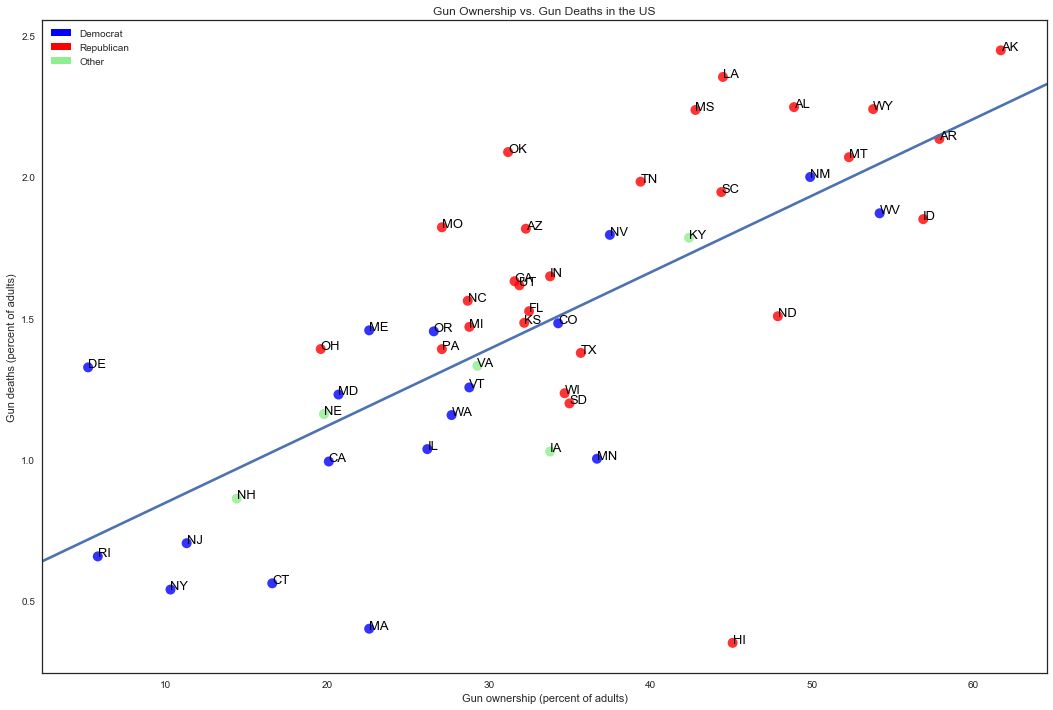

In [23]:
plt.figure(figsize=(18,12))

#create scatterplot
sns.set_style("white")

def color(row):
    if row['party'] == 'D':
        return '#0000FF'
    elif row['party'] == 'R':
        return '#FF0000'
    else:
        return '#90EE90'

guns['color'] = guns.apply(lambda row: color(row),axis=1)


plot1 = sns.regplot(x="gun_rate", y="death_rate", data = guns, ci = None, scatter_kws = {'s':100, 'facecolors': guns['color']})


for i, txt in enumerate(guns.state):
    plot1.annotate(txt, (guns.gun_rate[i],guns.death_rate[i]), fontsize=13, color='black')

plt.title("Gun Ownership vs. Gun Deaths in the US")
plt.xlabel("Gun ownership (percent of adults)")
plt.ylabel("Gun deaths (percent of adults)")


# Create legend
import matplotlib.patches as mpatches

classes = ["Democrat", "Republican", "Other"]
colors = ['#0000FF', '#FF0000', '#90EE90']
recs = []
for i in range(0,len(colors)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i]))
plt.legend(recs,classes,loc='best')

sns.plt.show()

**Differences from Vox graph:**
Here, both variables (gun ownership and gun deaths) are expressed in percentages.  A new variable is also visualized: the dominant political party of each state, represented by the color of each point.  Blue means Democratic, red means Republican, and green means ‘Other’ (unicameral or split).  These colors were selected intentionally because they are widely accepted as the color of each party (besides 'Other', for which green was selected).  This 'party' variable provides more context and a potential explanation for differences in gun ownership rates across different states.

**Improvements from first version:**
One major improvement is the conversion of the gun deaths rate from a decimal to percentage, to be consistent with the x-axis which is also in percent.  This was overlooked in the first version and is important to improving the accuracy of the graph and ensuring the audience interprets the numbers the way they were intended.  Additionally, the title has been edited to "Gun Ownership vs. Gun Death Rates in the US" to include the qualifier clearly in the overview, stating that this data is limited to the United States.  The light blue shading originally along the trend line has been removed to improve the data pixel ratio.  The shading represented the confidence interval which does not contribute to the claim in this graph so it was unnecessarily cluttering the graph.  Lastly, a legend was added to specify what each color of the points represents.  It is located in the upper left corner because there is plenty of space and it is easily accessible to the audience.

**Findings:**  
The graph does show that as gun ownership rates increase, the gun death rates increase as well.  It also shows that most of the Democratic states have lower gun ownership and death rates, while most of the Republican states have higher rates.  This suggests that a state’s political party may have an impact on gun ownership and death rates and could even be a confounding factor in this relationship.

**The Making Of/Documentation:**
1. Obtaining Data<br>
To recreate this graph, we need data on number of gun deaths by state and also number of adult gun ownerships by state.  The data sources used are listed below.
Data for gun ownership in 2013 was obtained from this published literature, also used in the original graph: 
http://injuryprevention.bmj.com/content/injuryprev/early/2015/06/09/injuryprev-2015-041586.full.pdf?keytype=ref&ijkey=doj6vx0laFZMsQ2T
The following is a description from the article of the data collection method:  “This study was performed using the 4000 respondents who were identified as a nationally representative cohort.”  All respondents surveyed were over age 18.  The data was presented as rates (number of people owning guns out of number of total people sampled per state).  There is no spreadsheet available for the data presented in this study, so the data for each state was manually entered into Excel.
Data for gun deaths from 2013 was obtained from the CDC website:
https://webappa.cdc.gov/cgi-bin/broker.exe
The following filters were used on the WISQARS site using the “Fatal Injury Reports, National, Regional and State (RESTRICTED), 1999-2016”:  cause of injury = Firearm; census region/state = [selected each state separately]; years of report = 2013; age groups = custom age range: 19 to 85+.  The data outputs included both counts and rates, so I just used the rates.
Fortunately, the data required was clean and simple already so no data wrangling or conversion was required.  The gun ownership rates and gun death rates were combined together into one Excel spreadsheet.
I also went back to the Excel CSV to multiply 100 to each of the gun deaths rates to convert them from decimals to percentages.
To include a new <br>
<br>
2. Creating the Visual<br>
The scatterplot was created in Python with the seaborn package.  An extra function was defined to add a new 'color' column to the dataframe so that each point on the plot was color-coded.  This new column was passed in as a dictionary value in the regplot 'scatter_kws' parameter.  State abbreviations for each point were added with a for loop.  The blue shading was removed by specifying 'ci = None' in regplot.  To add the legend, a matplotlib addon package was used with a for loop.

### Graph 10

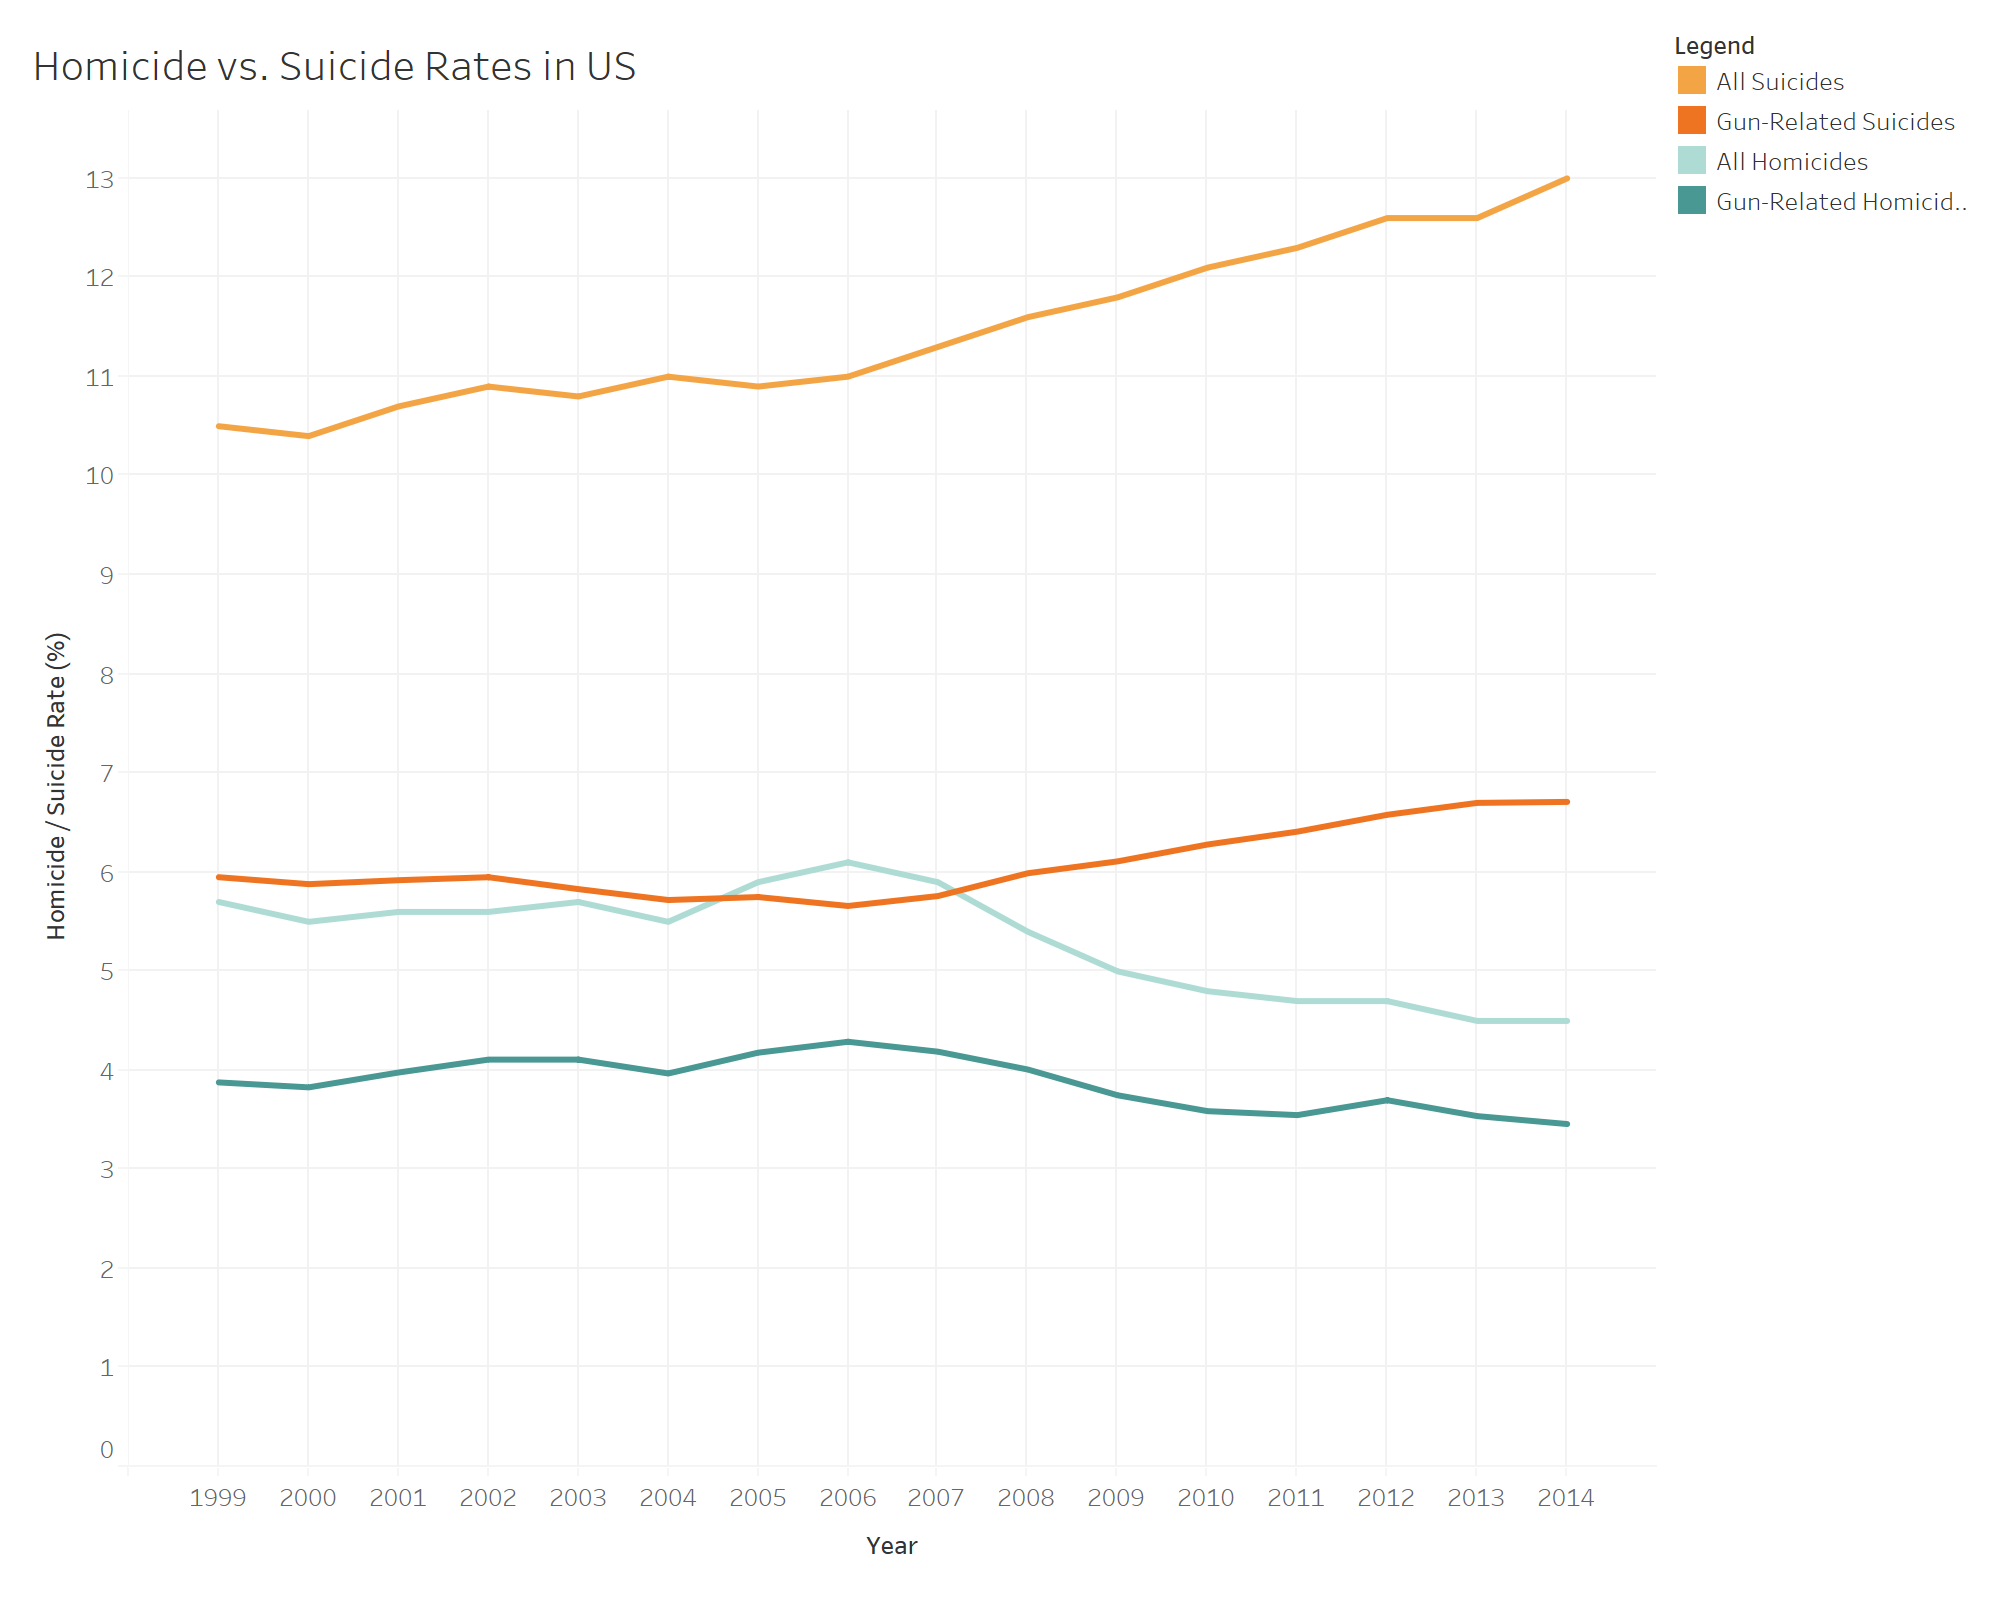

In [3]:
#import Tableau exported dashboard image 
from IPython.display import Image
Image("graph10_redesign_final.png")

**Differences from Vox graph:**
This graph includes line graphs of both the total homicide and suicide rates in the US as well as firearm-specific homicide and suicide rates, whereas the original graph only included gun-related rates.  The dots from the original line graph were also removed, presenting smoother and more easily interpretable lines.  Rates are used instead of counts so that all 4 lines could be placed on one graph and compared easily.  They all fit on the same graph because the rates are closer together than the raw counts.

**Improvements from first version:**
The two line charts (total rates versus firearm-specific rates) have been combined into one chart for easy comparison of all four lines.  The color scheme has also been selected more intentionally; the darker shades represent the key lines of interest, which are firearm-specific rates, and the lighter shades of the same color represent total rates.  This helps the audience pair up the corresponding lines and total to firearm-specific rates easily.  The gridlines from the first version were retained because they are subtle enough to not clash with the lines, and they do help the audience easily match up the year to the point they are looking at.  These gridlines seem to be particularly helpful when there is a big gap between the x-axis and the lines, which is the case here.

**Findings:**  
It turns out that the firearms lines follow the overall lines quite well over the years, weakening the original graph’s claim that more access to guns lead to more suicides.  If this were true, the trends of the lines would be different between the two graphs.  Furthermore, the gap between all suicides and gun-related suicides is much smaller than the gap between all homicides and gun-related homicides.  This seems to conflict with the original graph's claim that availability of guns leads to more suicides.


**The Making Of/Documentation:**
1. Obtaining Data<br>
Data on total homicide and suicide rates in the US were found in this CDC report:
https://www.cdc.gov/nchs/data/databriefs/db241_table.pdf#1
The report only gives data up through 2014 so the same year range was used for gun-specific rates.  The rates were provided so no data transformation was needed.
The gun-specific data was obtained from the WISQARS website: https://webappa.cdc.gov/sasweb/ncipc/mortrate10_us.html
On the site, I went to “Fatal Injury Reports, National and Regional, 1999-2015” and used the following filters: intent/manner of the injury = “Homicide”, cause or mechanism = “All injury”, years of report = 1999 to 2014.  Again, the rates were provided so no data transformation was needed.
These two datasets were then combined into one Excel spreadsheet and read into Tableau.<br>
<br>
2. Creating the Visual<br>
The spreadsheet was read into Tableau and used to generate a line graph.  The ‘Year’ dimension was added to Columns, and the ‘Total Homicide Rate’, ‘Total Suicide Rate’, 'Gun-related Homicide Rate', and 'Gun-related Suicide Rate' were all added to Rows.
One challenge was getting the two lines (homicides and suicides) to be plotted on the same axes for easy comparison rather than stacked on top of each other.  To achieve this, I dragged each subsequent measure onto the y-axis of the plot.  Then I selected “Synchronize axes”.  This sheet was added to a dashboard so the image could be exported later on.  The next step was to change the colors to carry more meaning and emphasize the claim being made.  To do this, I right clicked on the legend in the dashboard 
and explored the different palettes available in Tableau before settling on the colors in the final graph.

### Graph 12

In [24]:
suicides = pd.read_csv("suicide_methods.csv")
suicides

,Unnamed: 0,total_poison,firearm,cut,suffocation
0,Fatal,"53,249","166,300","5,882","83,460"
1,Attempted,"2,056,261","30,512","836,723","26,656"


In [32]:
suicides = suicides.drop(["Unnamed: 0"], axis=1)

In [47]:
fatal = suicides.iloc[0].tolist()
fatal

attempted = suicides.iloc[1].tolist()
attempted

['2,056,261', '30,512', '836,723', '26,656']

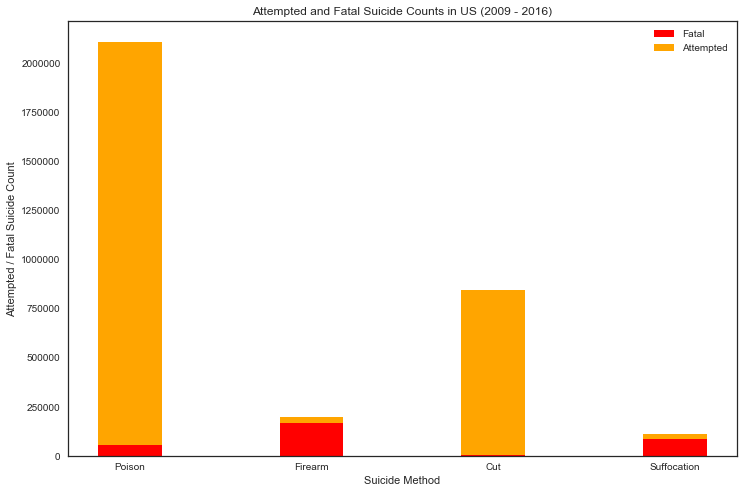

In [61]:
plt.figure(figsize=(12,8))

N = 4
fatal = (53249, 166300, 5882, 83460)
attempted = (2056261, 30512, 836723, 26656)
ind = np.arange(N)  
width = 0.35      

p1 = plt.bar(ind, fatal, width, color = "red")
p2 = plt.bar(ind, attempted, width,
             bottom=fatal, color = "orange")

plt.ylabel('Attempted / Fatal Suicide Count')
plt.xlabel('Suicide Method')
plt.title('Attempted and Fatal Suicide Counts in US (2009 - 2016)')
plt.xticks(ind, ('Poison', 'Firearm', 'Cut', 'Suffocation'))
#plt.legend((p1[0], p2[0]), ('Fatal', 'Attempted'))

classes = ["Fatal", "Attempted"]
colors = ['red', 'orange']
recs = []
for i in range(0,len(colors)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i]))
plt.legend(recs,classes,loc='best')

plt.show()

**Differences from original graph:**
The original graphs only included data from Indiana between 1990 to 1997.  This data is nationwide between 2009 to 2016, obtained from CDC's WISQARS database.  This is much more recent, which offers much more relevance to the audience, and it still has the same duration of 7 years, just like the original graph's duration.  I also added Suffocation as a category because it is actually the second most common method of suicide nationwide during this time period.  Unlike the original pie charts, this stacked bar graph also has labels for attempted versus fatal, which makes it much easier to interpret.

**Improvements from first version:**
I turned the multiple pie graphs into a stacked bar chart, because there are more than two suicide methods of interest and comparing multiple pie graphs is difficult.  It also condenses the data into one, organized graph.  A legend has been included to help the audience understand the data and see contrasts between fatal and nonfatal right away.  The colors have also now been selected purposefully, with red representing fatal suicides, as red is usually a flag or a "danger" sign.  Additionally, a clear title with a qualifier specifying the scope and timeframe of the data is now added.  The original version had multiple pie graphs so it was difficult to add a title that encompassed all the pies together.

**Findings:**
Even though the suicide method with the highest ratio of fatal to nonfatal was firearms as the original Vox graph claims, the method with the highest total number of fatal and nonfatal attempts was poison, by far.  This is probably due to the spread of drugs and rising numbers of drug overdoses over the years.  

**The Making Of/Documentation:** 
1. Obtaining Data<br>
The data was obtained from the CDC WISQARS database.  First, the different methods had to be independently selected from the fatal injuries data in WISQARS.  Then the same methods were independently selected again from the nonfatal injuries data in WISQARS.  In both cases, the Intention was selected to be "Suicides" and the year range was 2009 to 2016.  All the resulting raw counts were manually entered into an Excel CSV.  No data wrangling or conversions were necessary because the bar graph only uses raw counts.<br>
<br>
2. Creating the Visual<br>
The stacked bar graph was created in Python using the matplotlib package.  A template for the stacked bar graph Python code was found in the matplotlib gallery.  Here is the link: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html#sphx-glr-gallery-lines-bars-and-markers-bar-stacked-py  A legend was also added for at the top right corner for accessibility.


## II. Deception

### Graph 9

In [69]:
homicides = pd.read_csv("gun_homocides_graph9_v2.csv")
homicides

,Year,Deaths
0,1999,10828
1,2000,10801
2,2001,11348
3,2002,11829
4,2003,11920
5,2004,11624
6,2005,12352
7,2006,12791
8,2007,12632
9,2008,12179


In [70]:
homicides.info()

#convert deaths column from string to numeric datatype
homicides["Deaths"] = pd.to_numeric(homicides["Deaths"], errors='coerce')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
Year      18 non-null int64
Deaths    18 non-null int64
dtypes: int64(2)
memory usage: 360.0 bytes


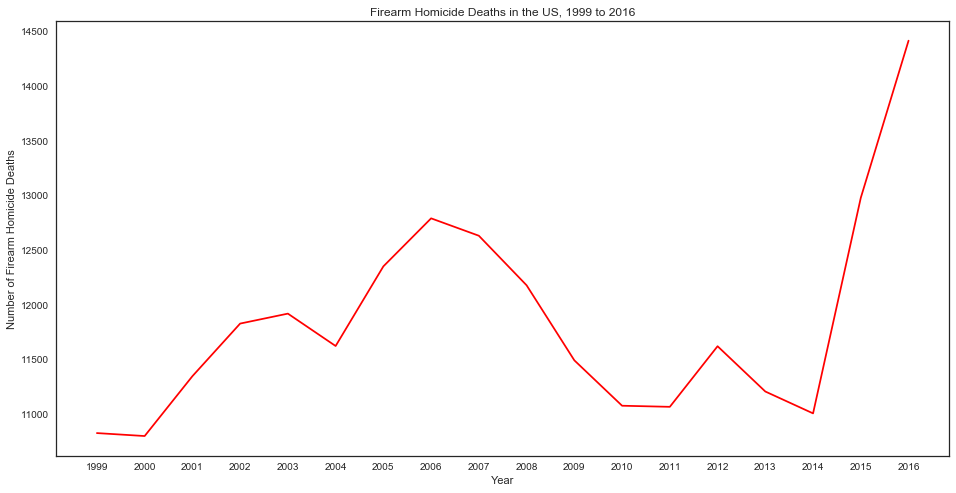

In [71]:
#plot
sns.set_style("white")
x = homicides['Year']
y = homicides['Deaths']  #use counts instead of percentage to be more deceptive
plt.figure(figsize=(16,8))
plt.plot(x, y, color='r')
plt.xticks(np.arange(1999, 2017, step=1))

#specify plot labels
plt.title("Firearm Homicide Deaths in the US, 1999 to 2016")
plt.xlabel("Year")
plt.ylabel("Number of Firearm Homicide Deaths")

**Vox vs. Deception claims:**

Original graph's claim: Homicide numbers have decreased in the past two decades.

Rebuttal presented by deception version: In the past two decades, homicide numbers have gone up and down and are now rising sharply.  

**Differences from Vox version:**
There are several key differences that lead to the differences between the two versions.  First, raw numbers were used instead of rates per 100,000 people, so now the y-axis spread is different. It's also important to note that now we no longer have context for the overall population, which can lead to deception and jumping to false conclusions.  We don't know if the population is growing or shrinking, we only know the number of firearm homicides.  Secondly, I used the timeframe 1999 to 2016 instead of their timeframe.  This more accurately represents the "last two decades" that the original claim refers to, and this is the key change that led to big differences in the graph.  This reveals that there were ups and downs in the past two decades and that now the number of firearm homicides is increasing again.  Thirdly, the y-axis is curtailed, as it begins far above 0.  As a result, the y-axis scale is also stretched out, which makes the ups and downs seem a lot bigger than they actually are.  

**Improvements from first version:**  The data timeframe has been changed from 1995-2015 to 1999-2016 to highlight the increase in homicides in the past two decades. The gridlines were removed because the default settings in matplotlib made them too bold so they detracted from the main point of the graph.  Since the line is relatively close to the x-axis, it should still be easy for the audience to read and match up the data points with the year even without gridlines.  The color of the line has also been changed from green to red, since the color red resembles danger and violence.

**Making of/Documentation:**

1. Obtaining Data<br>
Data was obtained from the CDC WISQARS website.  I selected the time period 1999 to 2016 and selected the output as "Year" to get the spreadsheet of number of firearm homicides by year.  The data comes with both counts and rates (proportional to the population), but I removed the other columns and just used the counts were used in the graph in order to exclude information about the actual population size.  Then the CSV file was read into Python.  In order to create the line plot, I also had to convert the "Deaths" column from string to numeric datatype in Python.
<br>
2. Creating the Visual<br>
Matplotlib in Python was used to generate the line graph.  I specified y to be death count and x to be year.  I had to specify the tick marks for the x-axis because otherwise, the plot turned the years into decimals which would be messy and difficult to interpret.  I used the code 'sns.set_style("white")' to get rid of the gridlines and used the 'color' parameter in plt.plot() to set the color of the line to red.  Below is the code for the generated visual.

### Graph 10

Graph 10's deception version was created in Tableau.  Below is the image, imported from files.

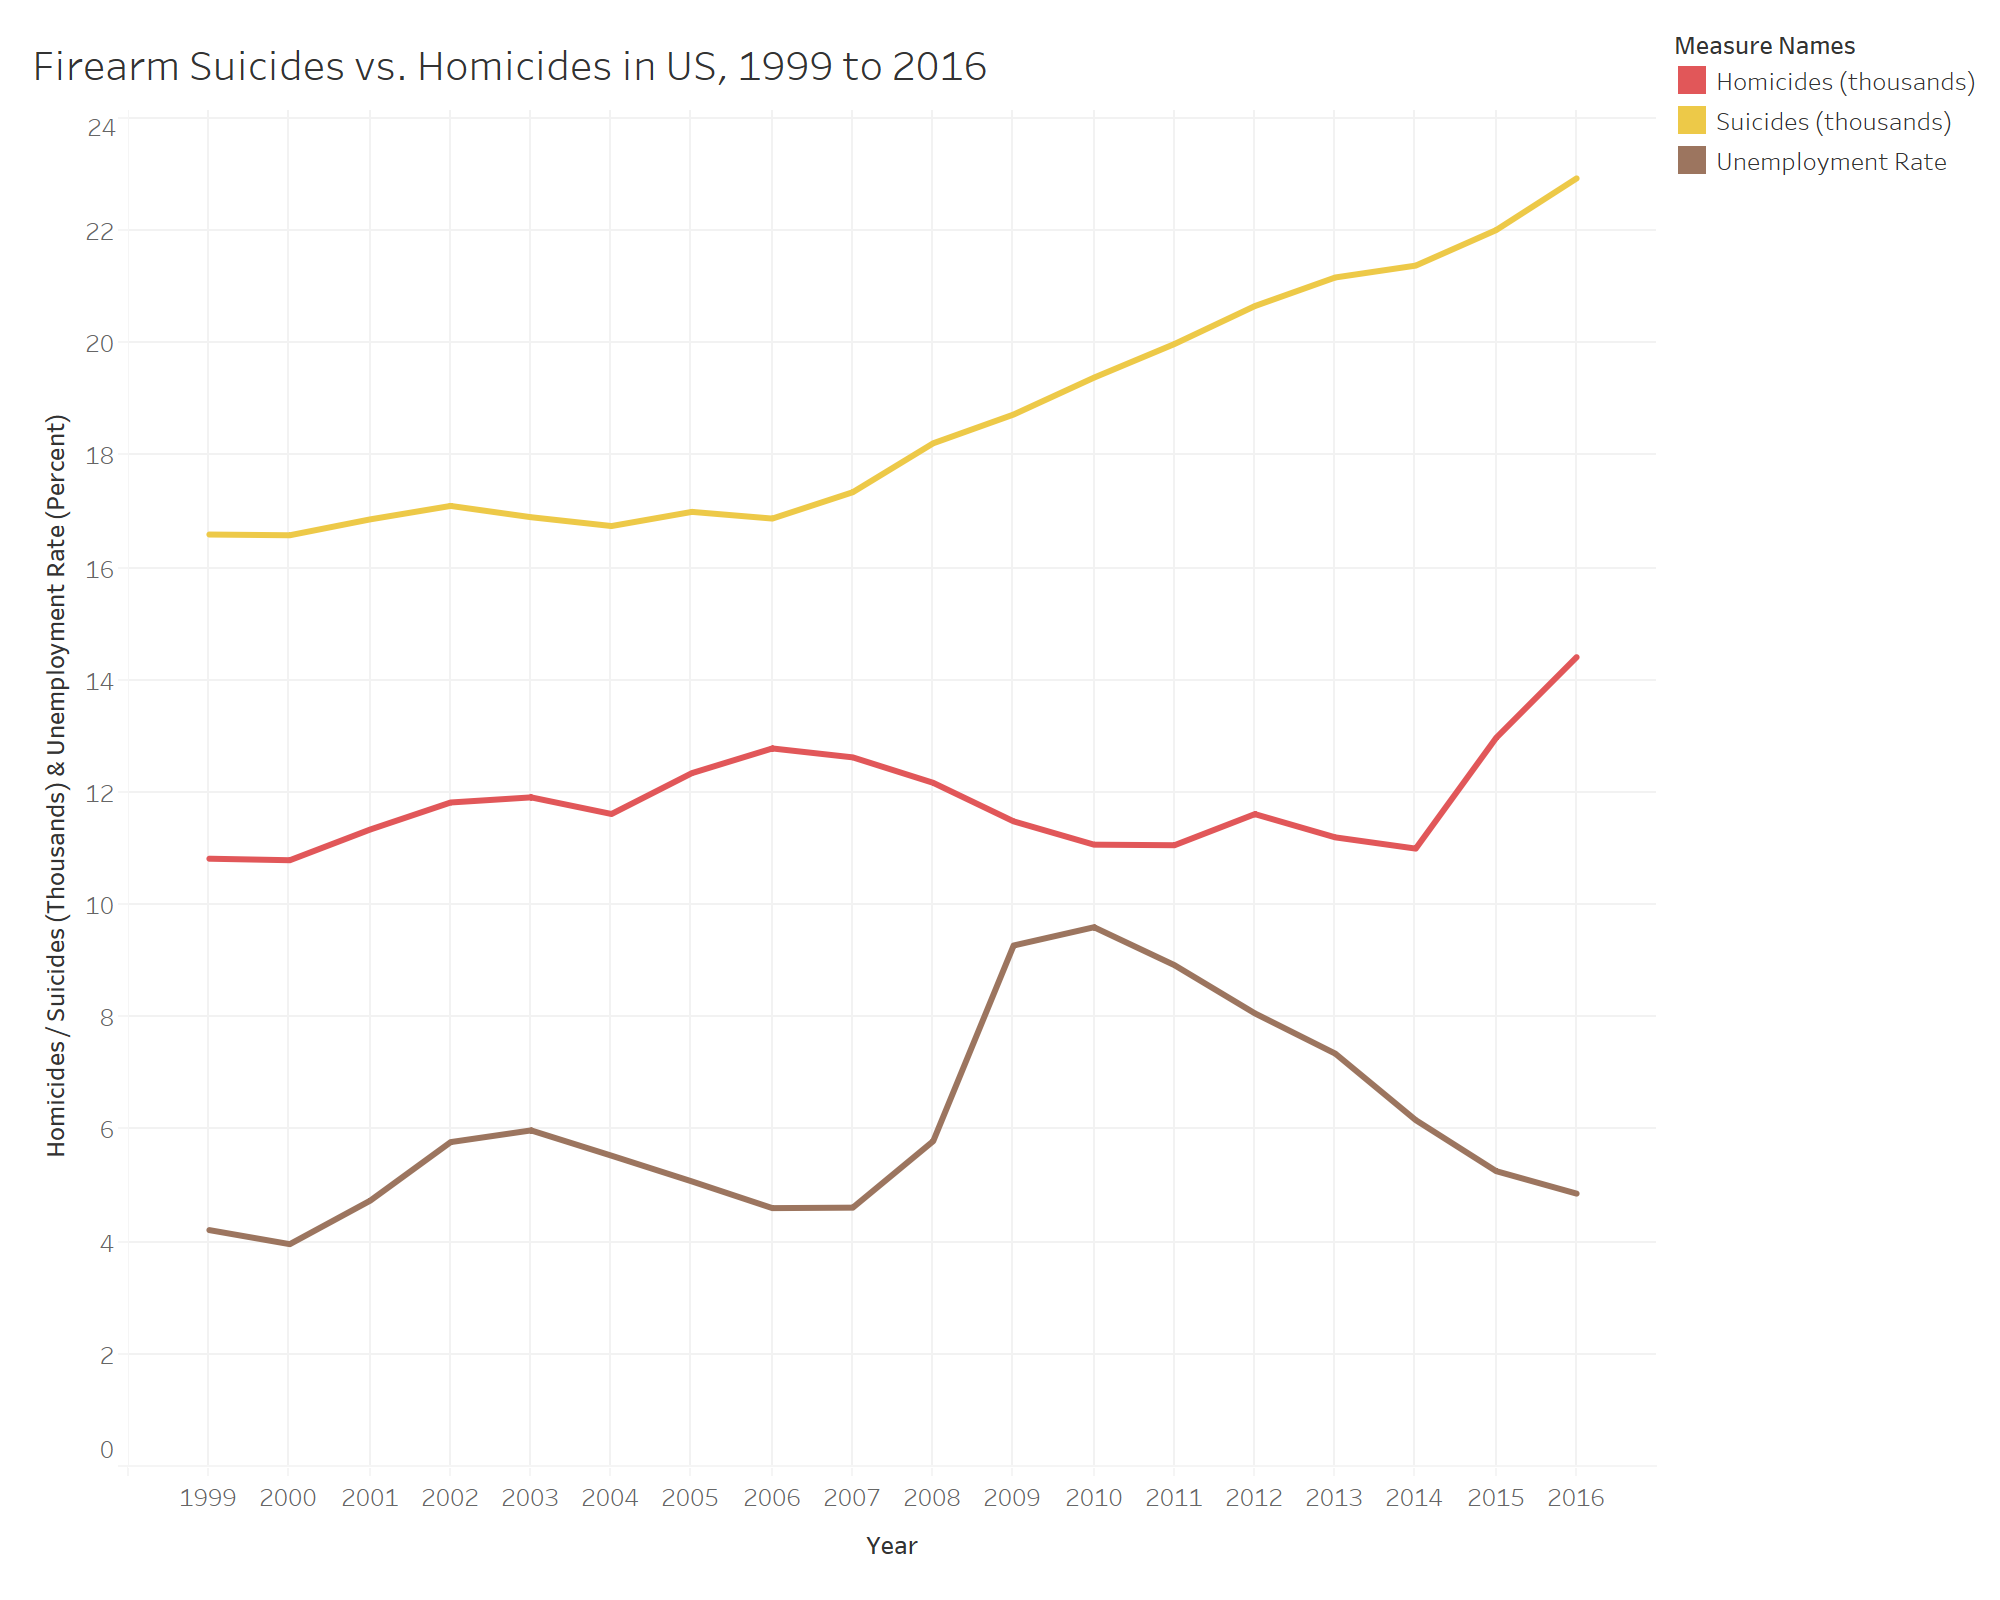

In [89]:
#import Tableau exported dashboard image 
from IPython.display import Image
Image("IP Deception Graph 10_final.png")

**Vox vs. Deception claims:**

Original claim: Most gun deaths are suicides and more gun access leads to more suicides.

Rebuttal presented by deception version: The rise in suicides happens quite suddenly starting in 2006 and increases very constantly over the next several years. In the original version, there is no data shown on gun access so we cannot connect gun access to suicides, and there may be another reason for the increase in suicides.

**Differences from Vox graph:**
Several features have been tweaked to make the rise of suicides more dramatic and downplay the changes in homicide numbers over the years.  The color of Suicides, which is the top line and the line of interest, has been set to a much darker shade than that of the Homicides line.  This draws the reader's attention to the Suicides line, which helps support the original claim that more gun access leads to more suicides.  Secondly, again the y-axis is truncated.  This stretches out the y-axis and makes the rise in suicides in the past few years seem a lot steeper than it actually is.  Lastly, the baseline graph of total homicides and suicides in the US (included in the improvement redesign) has been removed.  This further misleads the reader because now they have no context or baseline to compare these numbers to, so they may easily jump to false conclusions about gun access and its relation to suicides.

**Improvements from First Version & Reasoning:**
The first version did not include unemployment rates from 1999 to 2016, but I have included them here to observe the relationship between increase in unemployment and an increase in suicides around 2008.  In order to add the suicide and homicide counts on the same graph as unemployment rates (which are much smaller), the counts were divided by 1000.  Additionally, the dots at each point on the lines have been removed to produce a more streamlined, cleaner graph.  Lastly, the y-axis label and the title have been changed to be more specific.  The y-label now gives the numeric scaling (thousands and percent) for each line shown, and the title includes the geographic scope and timeframe for the data presented.

**Making of/Documentation:**

1. Obtaining Data<br>
Data for firearm homicides and suicides was obtained from the CDC WISQARS website.  I selected the time period 1999 to 2016 and selected the output as "Year" to get the spreadsheet of number of firearm homicides and suicides by year.  Since the homicides query was done separately from the suicides query, I then concatenated the two data outputs together into one Excel workbook.  The first few redundant columns had the same value for every observation so those were deleted in Excel.
Data for unemployment rates was obtained from the Bureau of Labor Statistics from the US Department of Labor, linked here: https://data.bls.gov/pdq/SurveyOutputServlet.  The site exports the results to an Excel spreadsheet.<br>
<br>
2. Data Wrangling<br>
The unemployment rates were exported as monthly data for each year.  Since I just wanted yearly data, I took the average of all months within a year in Excel to get a yearly average, which was used for this graph.  Next, I copied over the averages to the homicides/suicides spreadsheet.  For the homicides and suicides data, I rescaled them to be similar to the unemployment rate by creating a calculated field in Tableau.  I multipled the dimension by 0.001.  I used the resulting calculated fields to plot the lines.<br>
<br>
2. Creating the Visual<br>
The Excel file was read into Tableau.  The "Year" variable was placed in the column field, and the calculated fields for "Homicides" and "Suicides" variables were placed in the rows field.  The two lines are stacked on top of each other and share the same axes.  This was done by dragging the second variable to the axis until two vertical lines appeared (meaning they are synchronized).  Lastly, I dragged the unemployment rate dimension over to the same axes.  I also right clicked on the legend to adjust the colors of the lines.

### Graph 12

In [83]:
suicides2 = pd.read_csv("suicide_methods2.csv")
suicides2

,Unnamed: 0,total_poison,firearm,cut,suffocation
0,Fatal,1462,4365,158,1405
1,Attempted,65305,929,12949,888


In [ ]:
suicides2 = suicides2.drop(["Unnamed: 0"], axis=1)


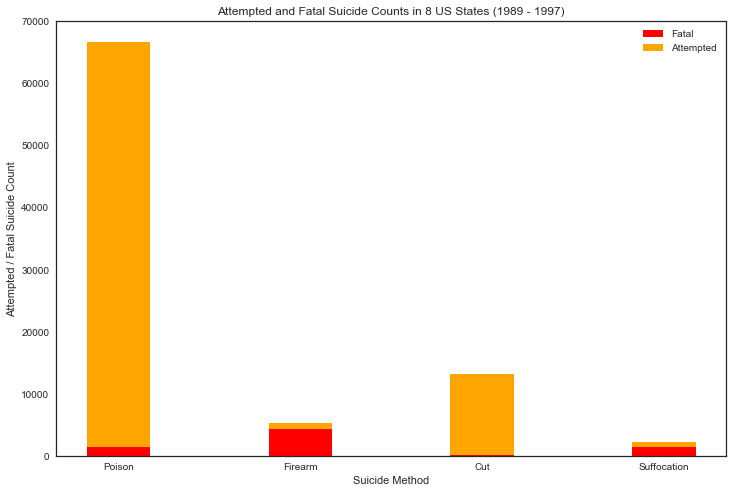

In [84]:
plt.figure(figsize=(12,8))

N = 4
fatal = (1462, 4365, 158, 1405)
attempted = (65305, 929, 12949, 888)
ind = np.arange(N)  
width = 0.35      

p1 = plt.bar(ind, fatal, width, color = "red")
p2 = plt.bar(ind, attempted, width,
             bottom=fatal, color = "orange")

plt.ylabel('Attempted / Fatal Suicide Count')
plt.xlabel('Suicide Method')
plt.title('Attempted and Fatal Suicide Counts in 8 US States (1989 - 1997)')
plt.xticks(ind, ('Poison', 'Firearm', 'Cut', 'Suffocation'))

classes = ["Fatal", "Attempted"]
colors = ['red', 'orange']
recs = []
for i in range(0,len(colors)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i]))
plt.legend(recs,classes,loc='best')

plt.show()

**Original vs. Deception claims:**

Original claim: Guns allow people to commit suicide more easily.

Rebuttal presented by deception version: Poison actually allows people to try and commit suicide more easily, as there are far more suicide attempts using poison than using a gun.  This may be because substances such as drugs are more accessible than guns.

**Differences from Vox graph:**
The original visual used data from Indiana 1990 to 1997, but this deception version uses data from a published article by R.S. Spicer et al. (2000), which can be found here: https://ajph.aphapublications.org/doi/pdf/10.2105/AJPH.90.12.1885
The study includes suicide fatalities and attempts pooled from 8 different states’ hospital records from 1989 to 1997.  Since the data is from 8 states rather than one state, the results shown by the graph are slightly different.  Another big difference is the graph is now a stacked bar, rather than having multiple pie charts.  In addition, the original pie charts displayed the data labels in percentages, but the deception bar chart displays them as the raw counts so we can see how many attempts and fatalities there actually were for each suicide method. This version shows that the total poison attempts were 65305, whereas the firearm attempts were only 929.  This suggests that it is easier to try and commit suicide using poison rather than firearms, contrary to the original claim.  In addition to changing the labels to show raw counts, the stacked bar chart curtails the y-axis rather than starting at 0.  This gives a skewed view, making changes seem much more dramatic than they actually are.  

**Improvements from first version & Reasoning:**
Although the data used is the same, the graph type has been changed from multiple pie charts to a stacked bar graph.  The bars can better show differences between raw counts, something that pie charts don't do very well since they emphasize proportions rather than counts.  Thus, using bars will help show the drastic number of suicide attempts using poison, which is far greater than number of attempted firearm suicides.  The poison attempt numbers stand out but this important piece of information would be hidden if a pie chart is used. Also instead of making the y-axis in terms of percentages (so every bar would go up to 100%), I used raw counts because that will also highlight the much higher number of poison suicide attempts.  If I had used pie graphs or a stacked bar adding up to 100, the focus would be on the proportion of fatalities to attempts, which would not support my claim.  Lastly, the colors were changed to symbolize suicides and violence, and a legend has been added so each bar does not need labeling and there is less clutter.

**Making of/Documentation:**

1. Obtaining data:<br>
The data was obtained from the aforementioned study, which directly provided the raw counts for each suicide method.  These numbers were entered into an Excel CSV and read into Python.  
<br>
2. Creating the visual:<br>
The matplotlib library was used to generate the stacked bar chart, and I followed a code template from the matplotlib gallery to create this.  The link is here: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html#sphx-glr-gallery-lines-bars-and-markers-bar-stacked-py  I also added an extra piece of code to create a custom legend for the plot and define specific colors to use, rather than using matplotlib's auto colors.